<a href="https://colab.research.google.com/github/Bhavani-Rupa/Social-Media-Fake-News-Detection/blob/main/Social%20Media%20Fake%20News%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/True.csv'
fake_path = '/content/drive/MyDrive/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [3]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Data Visulization

<ipython-input-5-8fb752d989ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')


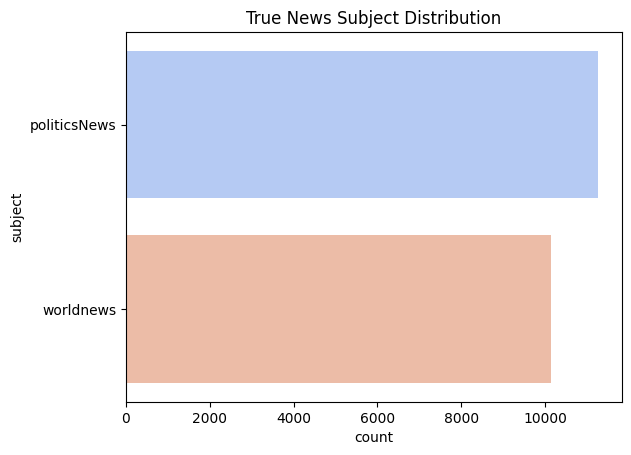

<ipython-input-5-8fb752d989ab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')


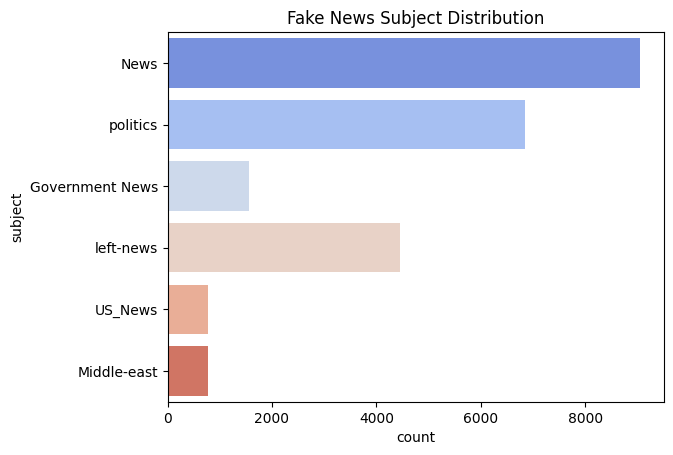

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

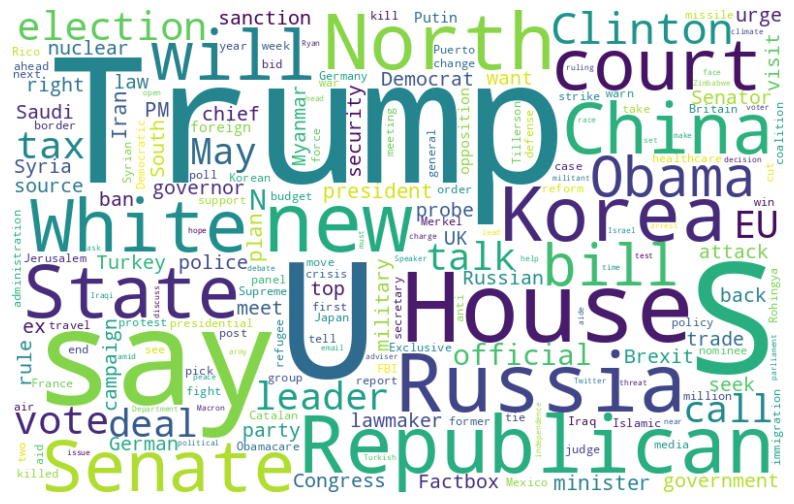

In [6]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

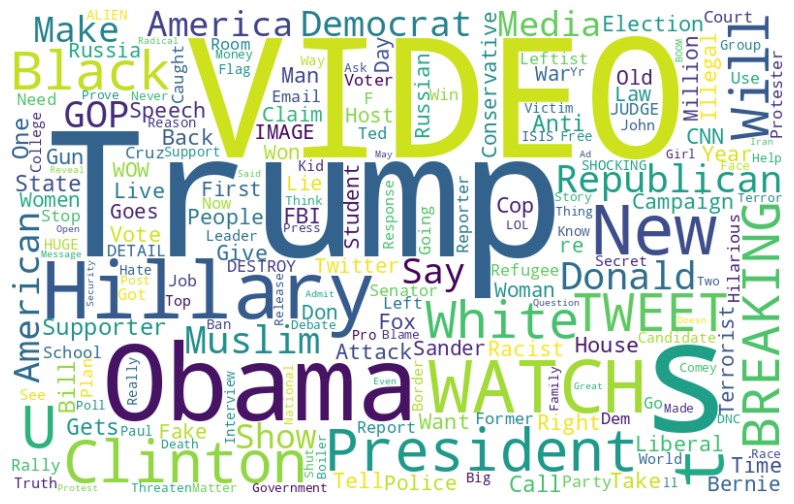

In [7]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [8]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [9]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


<ipython-input-10-48495321f256>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


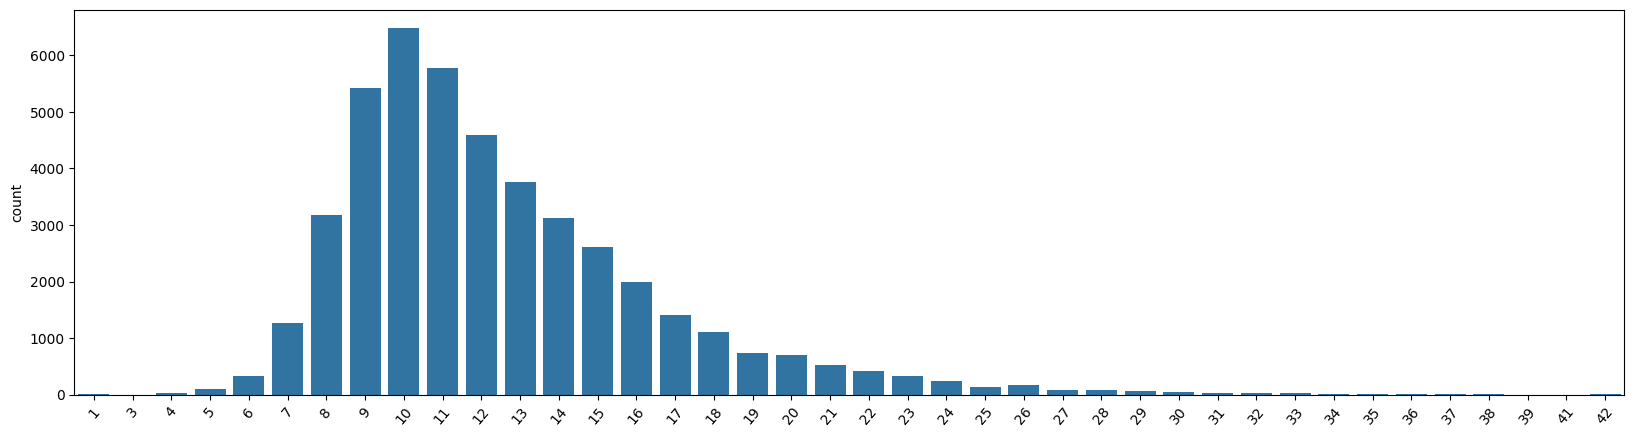

In [10]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [11]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [12]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,BREAKING: Federal Judge Declares MISTRIAL In B...,0
1,Russia already preparing military withdrawal f...,1
2,DNC Chair Asks Democrat Members Of Congress To...,0
3,The Exodus: The State Department’s Entire Sen...,0
4,Bernie Sanders Lets Chuck Todd Know If He’s W...,0
...,...,...
44893,OBNOXIOUS LEFTIST REPORTER IS REMOVED FROM TRU...,0
44894,Bill Maher Gets His Swagger On Over Liberal C...,0
44895,Factbox: U.S. carbon emissions seen declining ...,1
44896,"Paul Ryan Reveals That In College, He Was A C...",0


## Split Data into Training, Validation, Test

In [13]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Dataframe to csv

In [14]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [15]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Watch Trump Fans Attack Peaceful Protesters H...,0
1,FACTORY WORKER RIPS INTO Speaker Paul Ryan on ...,0
2,‘GENTLE GIANT’ MICHAEL BROWN MEMORIAL UNVEILED...,0
3,BRETT BAIER’S Dinner At Mar-a-Lago Over Thanks...,0
4,Nobel laureate Vargas Llosa calls Trump a 'clo...,1
...,...,...
8975,U.S. Nazi Party Leader: Trump’s Campaign Is A...,0
8976,You Won’t Believe This Racist Alabama Math Te...,0
8977,WHY THE HUGE 1.1 MILLION DROP in Food Stamp En...,0
8978,Is She Drunk? Nancy Pelosi Giggles Then Orders...,0


## Performing Data Cleaning

In [16]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [18]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [19]:
!pip install gensim

In [20]:
!pip install numpy==1.25.2
!pip install --upgrade gensim

In [21]:
import gensim

In [22]:
# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [23]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

## Preparing The Data By Performing Tokenization And Padding

In [24]:
from nltk import word_tokenize

In [25]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# LSTM

## Building And Training LSTM Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [28]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.8036 - loss: 0.3415 - val_accuracy: 0.9754 - val_loss: 0.0776
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9818 - loss: 0.0553 - val_accuracy: 0.9736 - val_loss: 0.0846
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9726 - val_loss: 0.0795


## Assessing Trained Model Performance

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM Model Accuracy :  0.5175946547884187
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4648
           1       0.00      0.00      0.00      4332

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.35      8980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


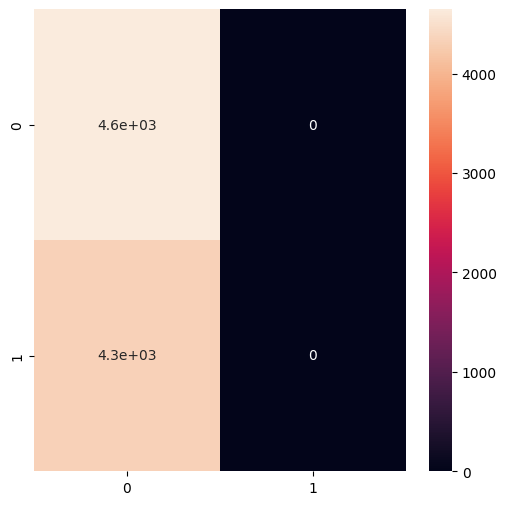

In [29]:
# Making prediction
prediction = np.argmax(model.predict(padded_test), axis=-1)

# Getting The Accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

SVM Model Accuracy:  0.9514476614699332
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4648
           1       0.94      0.96      0.95      4332

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



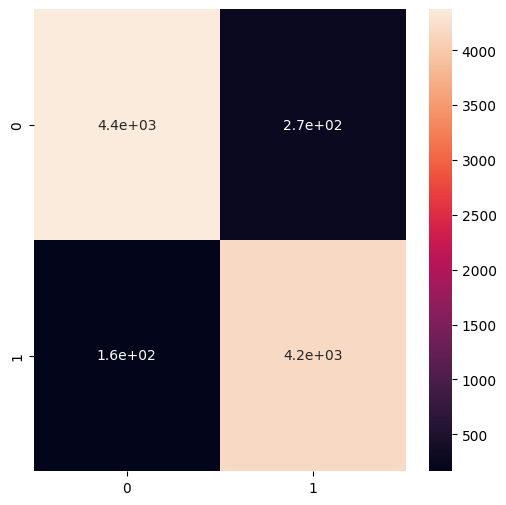

In [30]:
# SVM Model Implementation

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['title'])
X_val_tfidf = vectorizer.transform(val_df['title'])
X_test_tfidf = vectorizer.transform(test_df['title'])

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['true'])

# Predictions
svm_predictions = svm_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], svm_predictions)
print("SVM Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], svm_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], svm_predictions))


Naive Bayes Model Accuracy:  0.9363028953229399
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4648
           1       0.94      0.92      0.93      4332

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



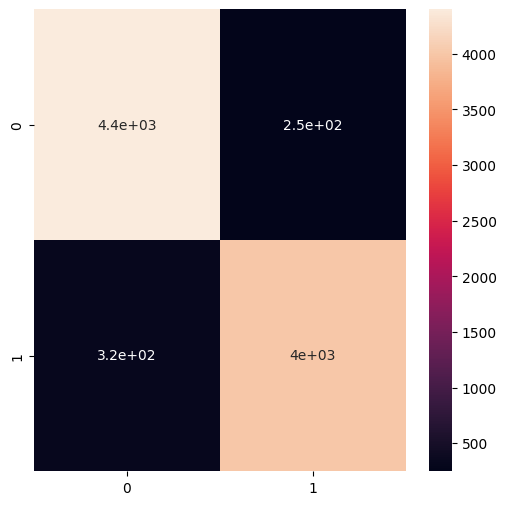

In [31]:
# Naive Bayes Model Implementation

from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['true'])

# Predictions
nb_predictions = nb_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], nb_predictions)
print("Naive Bayes Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], nb_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], nb_predictions))


Random Forest Model Accuracy:  0.9412026726057906
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4648
           1       0.94      0.94      0.94      4332

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



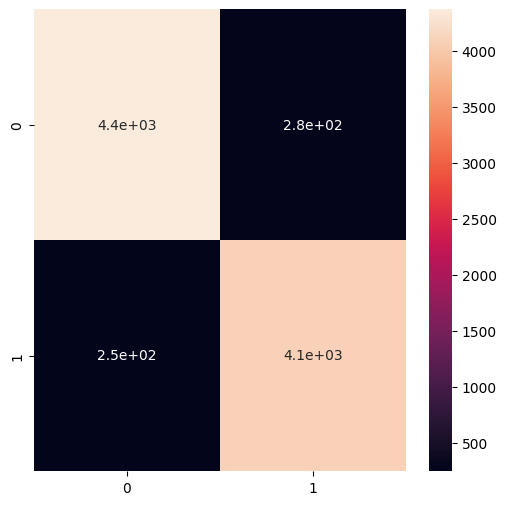

In [32]:
# Random Forest Model Implementation

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, train_df['true'])

# Predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], rf_predictions)
print("Random Forest Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], rf_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], rf_predictions))


# BERT

In [33]:
!pip install transformers

import torch
from transformers import BertTokenizer

In [34]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Load Dataset Class

In [35]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)


        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)


        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)

        return (tokens_tensor, segments_tensor, label_tensor)

    def __len__(self):
        return self.len


# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## Sampling and Observing Tensors

In [36]:
sample_idx = 0

statement, label = trainset.df.iloc[sample_idx].values
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)
print(f"""
original_statement:
{statement}

tokens:
{tokens}

label: {label}

--------------------

tokens_tensor:
{tokens_tensor}

segments_tensor:
{segments_tensor}

label_tensor:
{label_tensor}

""")


original_statement:
 Watch Trump Fans Attack Peaceful Protesters Holding ‘America’s Already Great’ Sign (VIDEO)

tokens:
['[CLS]', 'watch', 'trump', 'fans', 'attack', 'peaceful', 'protesters', 'holding', '‘', 'america', '’', 's', 'already', 'great', '’', 'sign', '(', 'video', ')', '[SEP]']

label: 0

--------------------

tokens_tensor:
tensor([  101,  3422,  8398,  4599,  2886,  9379, 13337,  3173,  1520,  2637,
         1521,  1055,  2525,  2307,  1521,  3696,  1006,  2678,  1007,   102])

segments_tensor:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor:
0




## Reforming the Dataset to Fit the Model

In [37]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None

    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)


    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)

    return tokens_tensors, segments_tensors, masks_tensors, label_ids

BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [38]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape}
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 25])
tensor([[  101,  3422,  8398,  4599,  2886,  9379, 13337,  3173,  1520,  2637,
          1521,  1055,  2525,  2307,  1521,  3696,  1006,  2678,  1007,   102,
             0,     0,     0,     0,     0],
        [  101,  4713,  7309, 10973,  2015,  2046,  5882,  2703,  4575,  2006,
          1996,  1523,  2079,  2498,  1524,  3519,  1031,  2678,  1033,   102,
             0,     0,     0,     0,     0],
        [  101,  1520,  7132,  5016,  1521,  2745,  2829,  3986, 11521,  1529,
          2678, 19566,  6545,  2081,  2012,  3986,  3962,  2006,  2168,  2154,
           102,     0,     0,     0,     0],
        [  101, 12049, 21790,  2121,  1521,  1055,  4596,  2012,  9388,  1011,
          1037,  1011,  2474,  3995,  2058, 15060,  5353,  2038,  1996,  2187,
          1999,  2440, 14899,  7698,   102],
        [  101, 10501, 17656, 20556,  2222,  8820,  4455,  8398,  1037,  1005,
         15912,  1998,  1037, 16939,  1005,   102,     0,     

## Model Construction

In [39]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [40]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Fine-Tuning of BERT

In [41]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]


        optimizer.zero_grad()

        outputs = model(input_ids=tokens_tensors,
                        token_type_ids=segments_tensors,
                        attention_mask=masks_tensors,
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        # batch loss
        train_loss += loss.item()

        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

## Save Model

In [42]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [43]:
# model = torch.load('./best_model.pth')
# model = model.to(device)

# Test

[[0.97975432 0.00545375]
 [0.02024568 0.99454625]]
Acc:  0.987305122494432


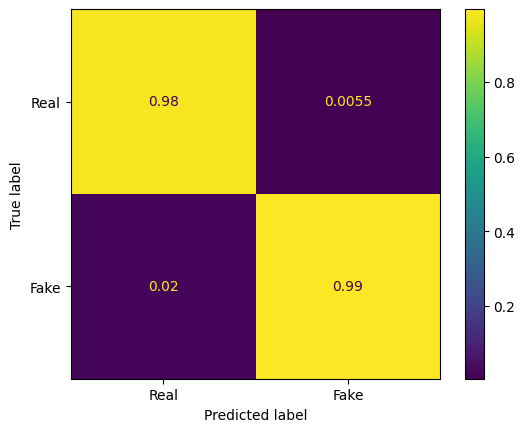

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors,
                    token_type_ids=segments_tensors,
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [45]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']],
                          testset.df.loc[:, ['true']],
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,Read President Obama’s Moving Proclamation De...,0,0
1,"WATCH: Texas Lt. Gov. Goes Full Racist, Blame...",0,0
2,The GOP Will Hate This Humiliating Fact Harry...,0,0
3,These Americans Actually Believe Martin Luthe...,0,0
4,Watch Heartbreaking Cries From An Abused Pupp...,0,0
...,...,...,...
8975,U.S. Nazi Party Leader: Trump’s Campaign Is A...,0,0
8976,You Won’t Believe This Racist Alabama Math Te...,0,0
8977,WHY THE HUGE 1.1 MILLION DROP in Food Stamp En...,0,0
8978,Is She Drunk? Nancy Pelosi Giggles Then Orders...,0,0


In [46]:
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4648
           1       0.98      0.99      0.99      4332

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Insight on Wrong Classification

<ipython-input-47-4fe9ad7547fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')


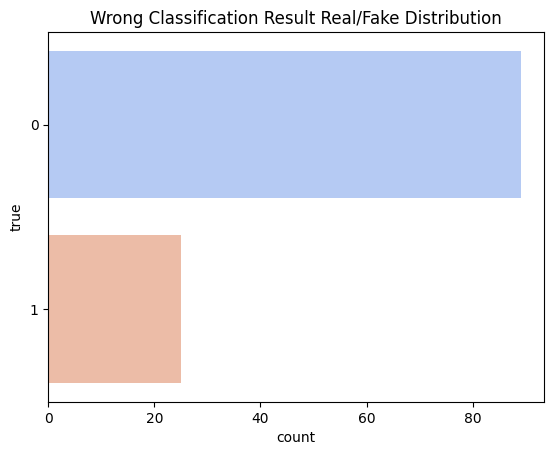

In [47]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [48]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array(['FULL SPEECH: Donald Trump Speaks to 20,000 PLUS In Mobile, AL',
       'Two Trump Tweets Debunk Russian Connection Conspiracy',
       'Utah Ranchers Vow to Stand Up to Government Abuse Despite Oregon Arrests',
       'Gun shops eye busy Black Friday despite Hillary Clinton loss',
       'Climate Change Pact Reached: Carbon Tax and Redistribution Of Wealth COMING SOON?',
       'VICE PRESIDENT PENCE BREAKS TIE In Bill Allowing States To Deny Federal Funds For Killing Babies',
       'TRUMP WANTS MODERATOR FREE Debate With Hillary',
       'TWO SENATORS SAY NO TO MOVING MUSLIM TERRORISTS FROM GUANTANAMO BAY TO THEIR STATES',
       ' Federal Judge Rules Same-Sex Couples Can Adopt Children In All Fifty States',
       'Figures show Trump spent $66 million of his own cash on election campaign',
       'BILDERBERG: More Secret Meetings with Trump Advisors, US Senators',
       ' Trump Continues To Solicit Illegal Donations From Foreign Lawmakers',
       ' Israeli Military General 

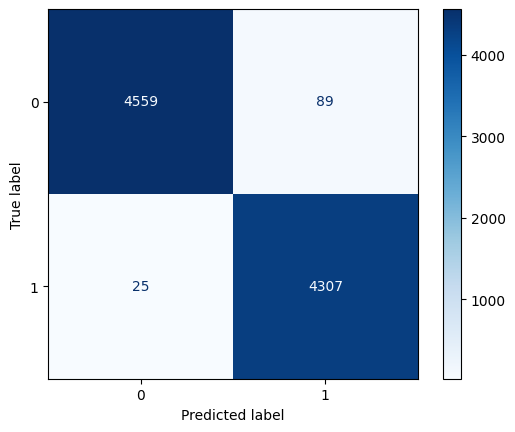

Accuracy: 98.73%


In [49]:
# Test

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true = []
predictions = []
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors,
                             token_type_ids=segments_tensors,
                             attention_mask=masks_tensors)

        logits = test_outputs[0]

        _, preds = torch.max(logits, dim=1)  # Get predicted class labels
        # Ensure true labels are added as individual elements, not arrays
        true.extend(data[3].cpu().numpy().tolist())  # True labels
        predictions.extend(preds.cpu().numpy().tolist())  # Predicted labels

# Confusion Matrix and Accuracy
cm = confusion_matrix(true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

accuracy = accuracy_score(true, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [50]:
import torch
from transformers import BertTokenizer
from torch.utils.data import DataLoader
from transformers import BertForSequenceClassification
from torch.nn.utils.rnn import pad_sequence  # Import pad_sequence

# Load the saved model
# model = torch.load('/content/best_model.pth')
# model = model.to(device)
# Load the saved model with `safe_globals` context manager
with torch.serialization.safe_globals([BertForSequenceClassification]):  # Allowlist global
    model = torch.load('/content/best_model.pth', weights_only=False)

model = model.to(device)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text input for prediction
sample_texts = ["This is a sample news article about politics.", "Fake news is spreading on social media."]

# Tokenize the input
def preprocess_text(texts):
    word_pieces = ['[CLS]']
    tokenized_texts = [tokenizer.tokenize(text) for text in texts]
    word_pieces += [item for sublist in tokenized_texts for item in sublist] + ['[SEP]']
    input_ids = tokenizer.convert_tokens_to_ids(word_pieces)
    return input_ids

input_ids = [preprocess_text([text]) for text in sample_texts]

# Pad sequences to the same length
input_ids = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=0).to(device) # Pad sequences

# Prepare DataLoader for prediction
class PredictionDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids):
        self.input_ids = input_ids

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

predict_dataset = PredictionDataset(input_ids)
predict_loader = DataLoader(predict_dataset, batch_size=1)

# Make predictions
model.eval()
predictions = []
with torch.no_grad():
    for data in predict_loader:
        tokens_tensor = data.to(device)
        outputs = model(input_ids=tokens_tensor)
        logits = outputs[0]
        _, predicted_class = torch.max(logits, dim=1)
        predictions.append(predicted_class.cpu().item())

# Display the predictions
for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if predictions[i] == 0 else 'True'}\n")

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Text: This is a sample news article about politics.
Prediction: Fake

Text: Fake news is spreading on social media.
Prediction: Fake



**Building Streamlit app**

In [51]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [52]:
%%writefile app.py
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import streamlit as st

# Set the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the entire saved model (no need for state_dict here)
model = torch.load('/content/best_model.pth', weights_only=False)
model = model.to(device)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Streamlit App UI
st.title('Fake News Detection')
st.write("Enter a news article or text below:")

# Text input box
input_text = st.text_area("Input Text", "Enter Text.")

if st.button('Predict'):
    if not input_text.strip():  # Check if input is empty or only whitespace
        st.error("Input Cannot be empty")
    else:
        # Tokenize the input text
        inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt", max_length=512)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)

    # Make predictions
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted_class = torch.max(logits, dim=1)
        prediction = 'Fake' if predicted_class.item() == 0 else 'True'

    # Display prediction
    st.write(f"Prediction: {prediction}")

Writing app.py


In [53]:
! pip install streamlit -q

In [54]:
!wget -q -O - ipv4.icanhazip.com

104.196.253.37


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.253.37:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://violet-pans-attend.loca.lt
2025-04-21 19:34:14.614936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745264054.638519    6709 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745264054.645742    6709 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 19:34:19.559 Examining the path of torch.classes raised:
Traceback (most recent call last):

In [ ]:
!pip install flask transformers torch
